# Pareto front plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

## Read trials results 
These are stored in `vanilla.csv`

In [2]:
#results_dir = 'results_week3_SH_515/' # set results directory
#results_dir = 'results_week3_SH_530/'
results_dir = 'results_wk3_608/'

df = pd.read_csv("../"+results_dir+"vanilla.csv")

In [3]:
df

,number,values_0,values_1,values_2,datetime_start,datetime_complete,duration,params_learning_rate,params_model_name,params_train_batch_size,params_training_loss,params_weight_decay,state
0,0,0.163693,0.042111,32.706535,2023-06-08 15:27:40.465765,2023-06-08 15:31:35.419026,0 days 00:03:54.953261,0.000002,linknet,53,xsigmoid,5.334963e-11,COMPLETE
1,1,0.036582,0.003343,1.054561,2023-06-08 15:31:35.445100,2023-06-08 15:42:30.766557,0 days 00:10:55.321457,0.000462,pspnet,32,smooth,3.134428e-10,COMPLETE
2,2,0.035434,0.004780,1.040725,2023-06-08 15:34:13.878275,2023-06-08 15:49:02.079911,0 days 00:14:48.201636,0.000040,linknet,14,xtanh,2.390193e-06,COMPLETE
3,3,0.036570,0.003277,1.055088,2023-06-08 15:34:13.884726,2023-06-08 15:46:50.394963,0 days 00:12:36.510237,0.003627,deeplabv3,116,smooth,3.705941e-04,COMPLETE
4,4,0.022810,0.000991,0.962645,2023-06-08 15:34:14.241122,2023-06-08 15:44:59.191218,0 days 00:10:44.950096,0.000818,unet++,104,mae,2.576857e-07,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,582,0.028803,0.002220,1.011747,2023-06-09 02:46:27.977012,2023-06-09 03:01:57.834652,0 days 00:15:29.857640,0.007528,fpn,5,huber,4.287410e-09,COMPLETE
583,583,0.154972,0.022149,1.484273,2023-06-09 02:50:11.272863,2023-06-09 03:03:39.029934,0 days 00:13:27.757071,0.000003,fpn,32,huber,4.505385e-09,COMPLETE
584,584,0.035623,0.002592,1.033404,2023-06-09 02:51:56.715006,2023-06-09 03:07:30.716566,0 days 00:15:34.001560,0.000015,manet,34,huber,2.867955e-08,COMPLETE
585,585,0.023580,0.001111,0.967973,2023-06-09 02:53:22.354690,2023-06-09 02:58:58.620723,0 days 00:05:36.266033,0.000492,manet,35,huber,4.296738e-09,COMPLETE


## Plot individual metric values

(-0.1, 0.4)

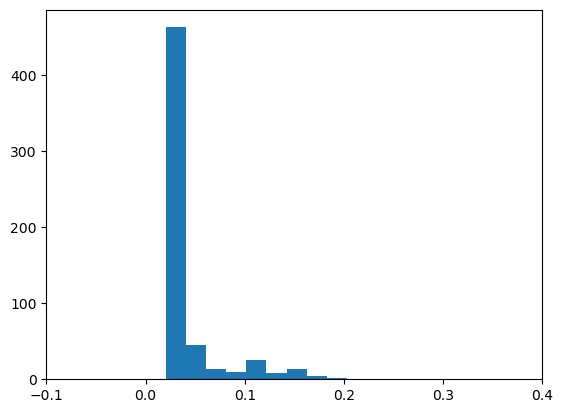

In [22]:
plt.hist(df.values_0, bins=20);
plt.xlim([-0.1,0.4])

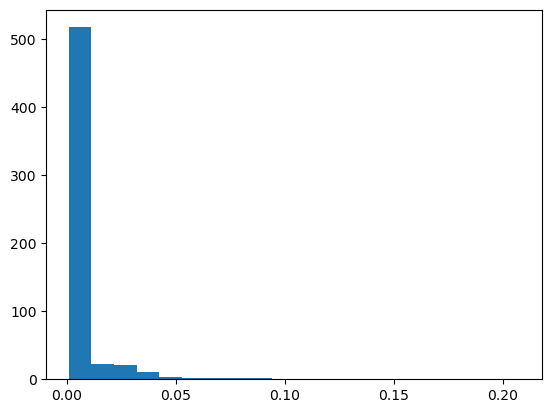

In [5]:
plt.hist(df.values_1, bins=20);

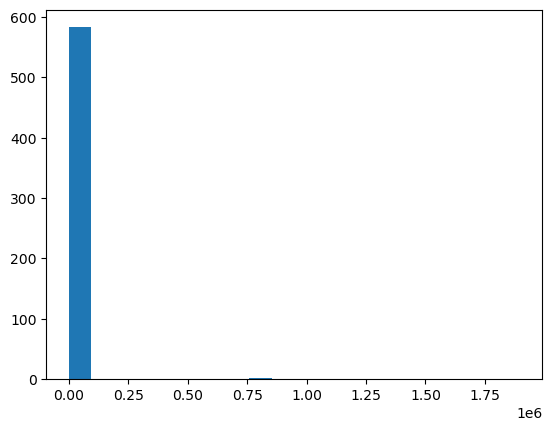

In [6]:
plt.hist(df.values_2, bins=20);

## Plot 2 metrics

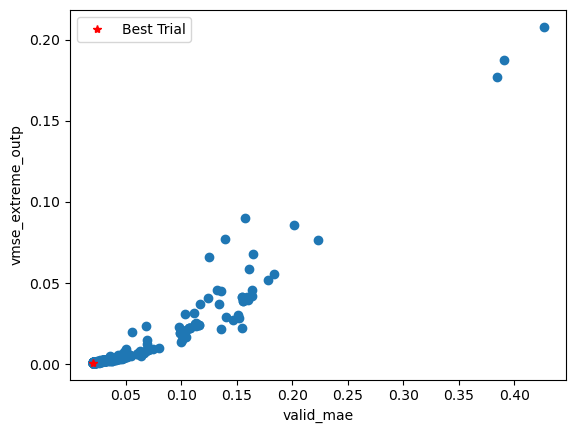

In [8]:
plt.scatter(df.values_0, df.values_1)

plt.plot(min(df.values_0), min(df.values_1), 'r*', label='Best Trial')

# add bounds
#maxval=5
#plt.xlim(0,maxval)
#plt.ylim(0,maxval)

#plt.xlabel('valid_custom')
plt.xlabel('valid_mae')

#plt.ylabel('valid_custom_second')
plt.ylabel('vmse_extreme_outp')

plt.legend();

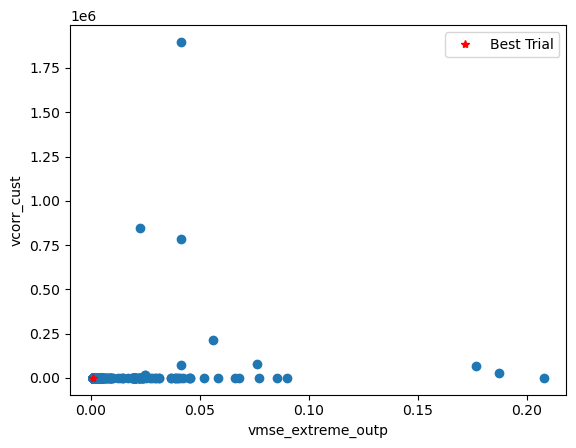

In [9]:
plt.scatter(df.values_1, df.values_2)

plt.plot(min(df.values_1), min(df.values_2), 'r*', label='Best Trial')

#maxval=5
#plt.xlim(0,maxval)
#plt.ylim(0,maxval)

#plt.xlabel('valid_custom_second')
plt.xlabel('vmse_extreme_outp')

#plt.ylabel('valid_custom_third')
plt.ylabel('vcorr_cust')

plt.legend();

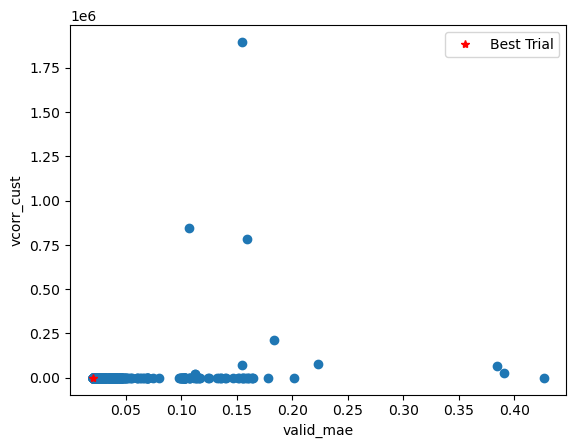

In [10]:
plt.scatter(df.values_0, df.values_2)

plt.plot(min(df.values_0), min(df.values_2), 'r*', label='Best Trial')

#maxval=2
#plt.xlim(0,maxval)
#plt.ylim(0,maxval)

#plt.xlabel('valid_custom')
plt.xlabel('valid_mae')

#plt.ylabel('valid_custom_third')
plt.ylabel('vcorr_cust')

plt.legend();

## 3D scatter with matplotlib

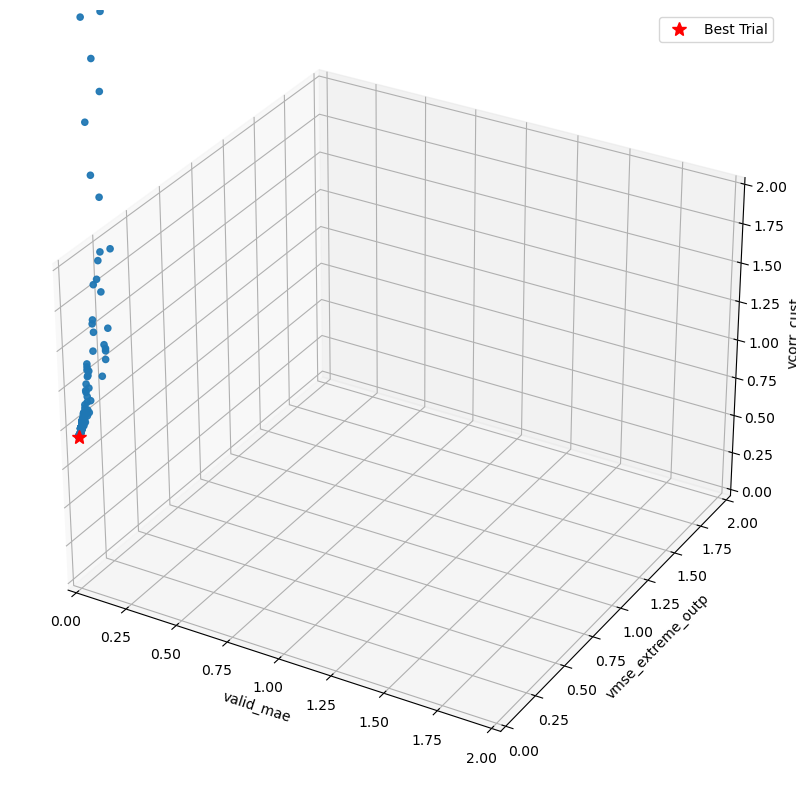

In [20]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

# set bounds
maxval=2
ax.set_xlim3d(None,maxval)
ax.set_ylim3d(None,maxval)
ax.set_zlim3d(None,maxval)

# axis labels
#ax.set_xlabel('valid_custom')
ax.set_xlabel('valid_mae')

#ax.set_ylabel('valid_custom_second')
ax.set_ylabel('vmse_extreme_outp')

#ax.set_zlabel('valid_custom_third')
ax.set_zlabel('vcorr_cust')

ax.scatter(df.values_0, df.values_1, df.values_2)

ax.plot(min(df.values_0), min(df.values_1), min(df.values_2), 'r*', markersize=10, label='Best Trial', zorder=10);

plt.legend();

#plt.savefig('../'+results_dir+'pareto_front_zoom.png', bbox_inches='tight', pad_inches=0.5);

## 3D scatter with plotly

In [12]:
# check min indices
print(df.values_0.idxmin(), df.values_1.idxmin(), df.values_2.idxmin())

235 160 448


In [13]:
# check values
print(df.loc[df.values_0.idxmin()].values_0, df.loc[df.values_1.idxmin()].values_1, df.loc[df.values_2.idxmin()].values_2)

0.0203139726072549 0.00083888277004 0.9575259558920152


In [18]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_model_name',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    #labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    labels={'values_0':'valid_mae', 'values_1':'vmse_extreme_outp', 'values_2':'vcorr_cust'},
                    width=1000, height=800)

# add best trial - still in progress trying to figure out how to add or highlight a single point
#idx=129
#fig = px.scatter_3d(df.loc[129], x=df.loc[idx].values_0, y=df.loc[idx].values_1, z=df.loc[idx].values_2,
#                    color='black')


fig.show()

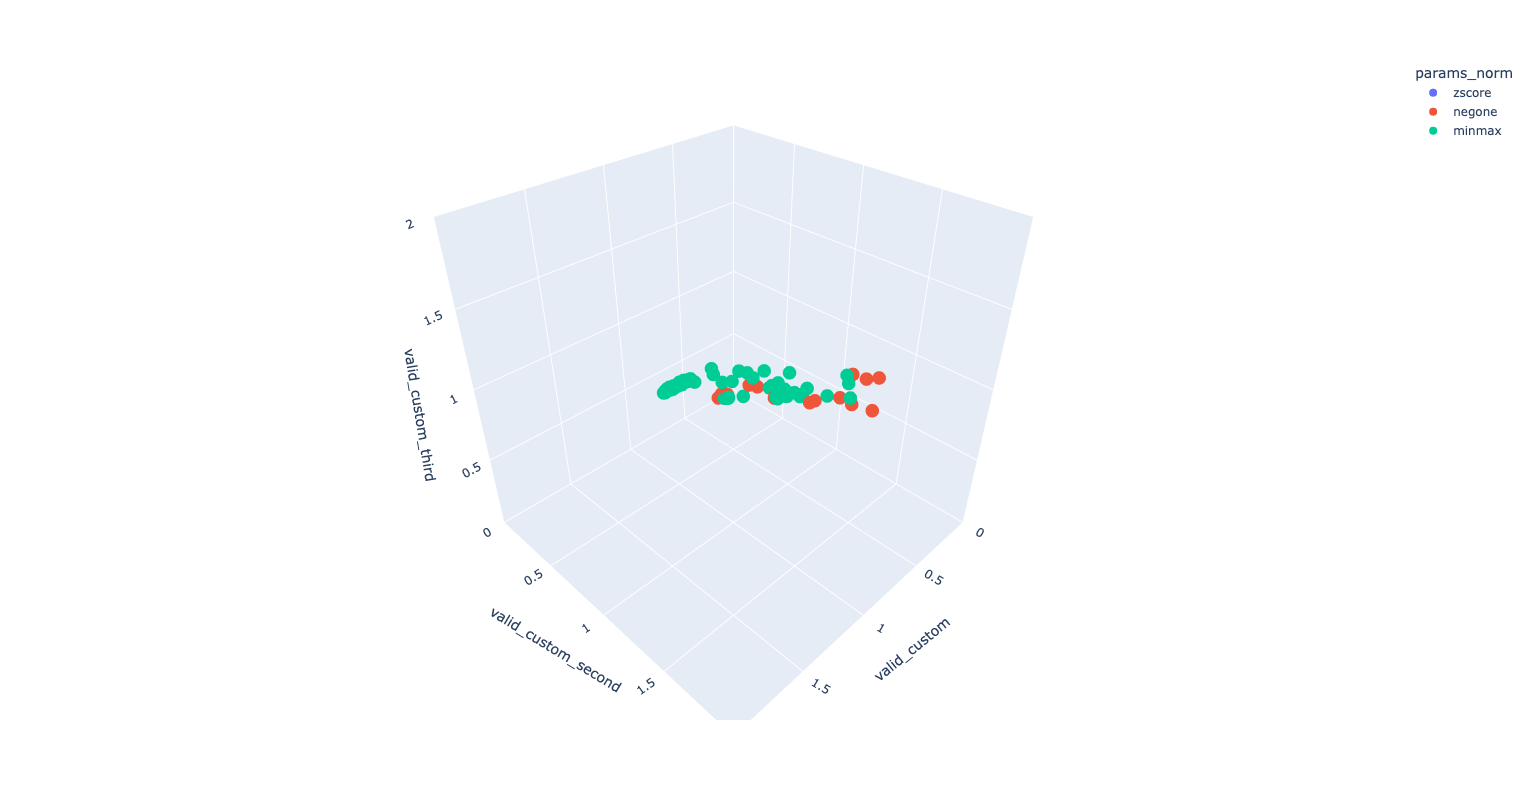

In [28]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_norm',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    width=1000, height=800)


fig.show()

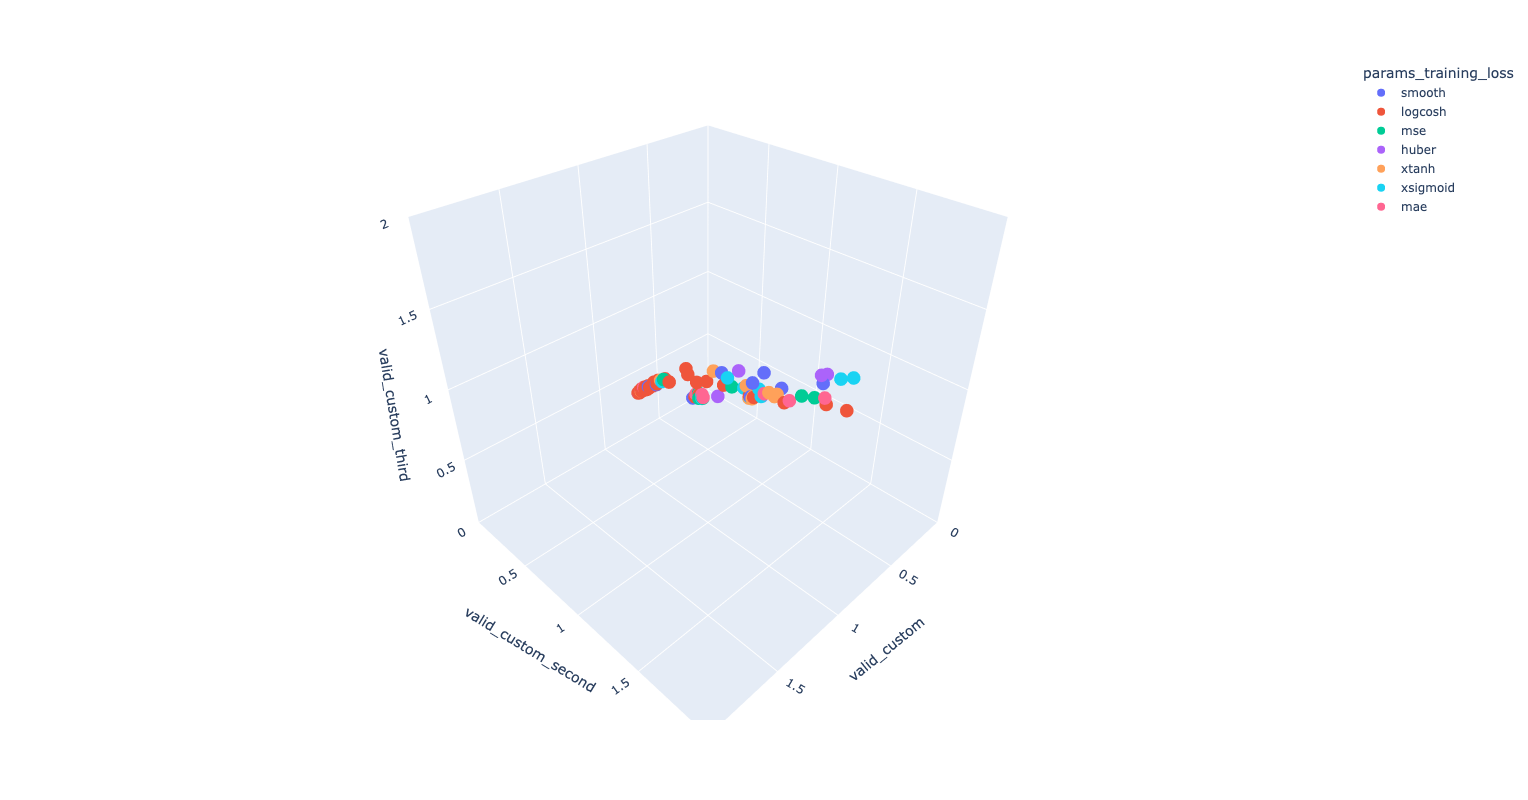

In [34]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_training_loss',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    width=1000, height=800)


fig.show()

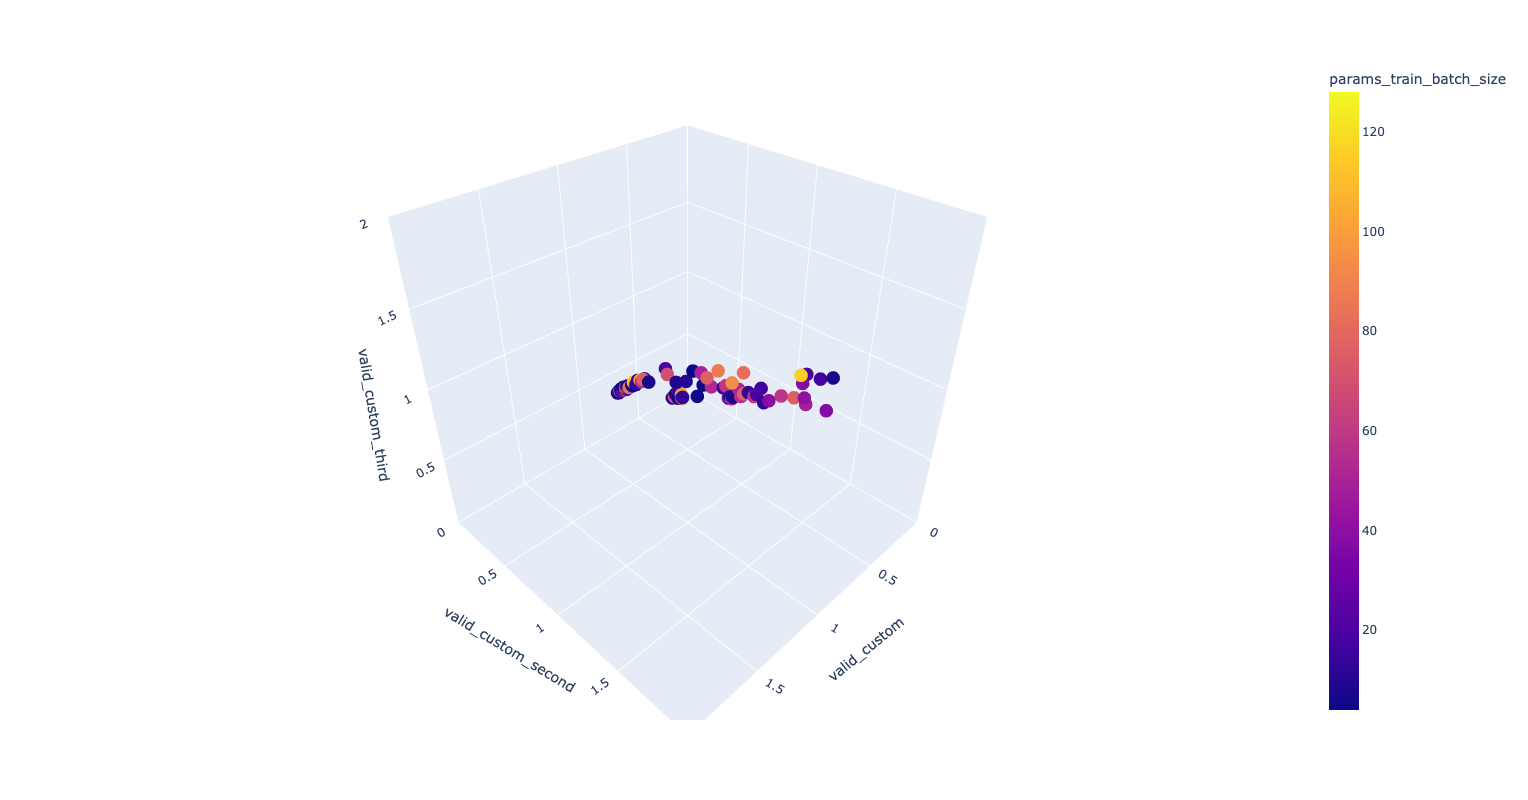

In [35]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_train_batch_size',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    width=1000, height=800)


fig.show()

In [42]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_learning_rate',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    width=1000, height=800)


fig.show()

# this needs an additional package
#fig.write_image('../'+results_dir+'pareto_front_lr.png')

In [43]:
# set bounds
maxval=2
ranges = [0,maxval]

fig = px.scatter_3d(df, x='values_0', y='values_1', z='values_2',
                    color='params_weight_decay',
                    range_x=ranges, range_y=ranges, range_z=ranges,
                    labels={'values_0':'valid_custom', 'values_1':'valid_custom_second', 'values_2':'valid_custom_third'},
                    width=1000, height=800)


fig.show()

## TO DO: look into [PyVista](https://docs.pyvista.org/version/stable/)